# WHO COVID-19 Info Through Various Countries
## This is part of a series of introductory data science projects in exploratory data analysis (EDA) which anyone who is a beginner in the field can follow along!

We start by importing the needed libraries:

In [87]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import urllib
import matplotlib.pyplot as plt
import seaborn as sns

We will use the data from the WHO site about COVID-19. If you type the following link on your browser it will download a csv file to your computer from this site. In order to store this csv file in the folder where this Jupyter Notebook is stored, follow the lines of code below:

In [3]:
url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
file_path = os.path.join("data","covid")

In [4]:
os.makedirs(file_path, exist_ok = True)
csv_path = os.path.join(file_path, "WHO-COVID-19-global-data.csv")
urllib.request.urlretrieve(url,csv_path)

('data\\covid\\WHO-COVID-19-global-data.csv',
 <http.client.HTTPMessage at 0x1fc181c2c88>)

Let's create a data structure from our csv file and take a look at how our data looks like - we will use df.tail() to see the latest COVID-19 cases:

In [5]:
df = pd.read_csv(csv_path)

In [11]:
df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
130933,2021-07-03,ZW,Zimbabwe,AFRO,1442,52663,33,1841
130934,2021-07-04,ZW,Zimbabwe,AFRO,1002,53665,18,1859
130935,2021-07-05,ZW,Zimbabwe,AFRO,809,54474,19,1878
130936,2021-07-06,ZW,Zimbabwe,AFRO,1540,56014,33,1911
130937,2021-07-07,ZW,Zimbabwe,AFRO,0,56014,28,1939


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130938 entries, 0 to 130937
Data columns (total 8 columns):
Date_reported        130938 non-null object
Country_code         130386 non-null object
Country              130938 non-null object
WHO_region           130938 non-null object
New_cases            130938 non-null int64
Cumulative_cases     130938 non-null int64
New_deaths           130938 non-null int64
Cumulative_deaths    130938 non-null int64
dtypes: int64(4), object(4)
memory usage: 8.0+ MB


df.info() allowed us to look at the type of data we have (a.k.a. the columns in our data structure). We can work with the following data:
1. date when the new cases were reported
2. the country code
3. the country where the patients are from
4. the WHO region of the country
5. the number of new cases
6. the cumulative cases
7. number of new deaths
8. the cumulative deaths (the cumulative death rate tells us about the proportion of the patients that die over a specified time interval)

Let's check out to which countries had reported more than 2000 new deaths in a day:

In [122]:
df.loc[df.New_deaths > 2000,['New_deaths','Country','Date_reported']]

,New_deaths,Country,Date_reported
4694,3351,Argentina,2020-10-03
15904,2286,Brazil,2021-03-12
15905,2233,Brazil,2021-03-13
15906,2216,Brazil,2021-03-14
15910,2841,Brazil,2021-03-18
...,...,...,...
125272,2397,United States of America,2021-02-20
125273,2410,United States of America,2021-02-21
125274,2004,United States of America,2021-02-22
125278,2099,United States of America,2021-02-26


We see that Argentina had 3351 reported new deaths on the 3rd of October 2020. Now let's take a look at which country had the highest amount of deceased patients since the pandemic started beginning of 2020:

In [37]:
df['Cumulative_deaths'].max()

600930

In [38]:
df[df['Cumulative_deaths'] == 600930]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
125410,2021-07-08,US,United States of America,AMRO,36990,33429396,473,600930


Now that we know that the States had the highest number of deceased, let's see which country had the least number of deceased:

In [39]:
df['Cumulative_deaths'].min()

0

This is an incorrect way of doing it, since the cumm. cases were zero when the pademic started. We will take a look at today's date - 2021-07-08 and see which country had the least amount of death cases since the pandemic started:

In [44]:
df[df['Date_reported'].apply(lambda date: date[0:4] == '2021')]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
364,2021-01-01,AF,Afghanistan,EMRO,183,52513,12,2201
365,2021-01-02,AF,Afghanistan,EMRO,73,52586,10,2211
366,2021-01-03,AF,Afghanistan,EMRO,123,52709,10,2221
367,2021-01-04,AF,Afghanistan,EMRO,200,52909,9,2230
368,2021-01-05,AF,Afghanistan,EMRO,102,53011,7,2237
...,...,...,...,...,...,...,...,...
130933,2021-07-03,ZW,Zimbabwe,AFRO,1442,52663,33,1841
130934,2021-07-04,ZW,Zimbabwe,AFRO,1002,53665,18,1859
130935,2021-07-05,ZW,Zimbabwe,AFRO,809,54474,19,1878
130936,2021-07-06,ZW,Zimbabwe,AFRO,1540,56014,33,1911


In [50]:
df[df['Date_reported'].apply(lambda date: date[0:10] == '2021-07-07') & (df['Cumulative_deaths'] == 0)]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
2208,2021-07-07,AS,American Samoa,WPRO,0,0,0,0
3865,2021-07-07,AI,Anguilla,AMRO,0,111,0,0
25966,2021-07-07,CK,Cook Islands,WPRO,0,0,0,0
30386,2021-07-07,KP,Democratic People's Republic of Korea,SEARO,0,0,0,0
32595,2021-07-07,DM,Dominica,AMRO,3,197,0,0
38120,2021-07-07,FK,Falkland Islands (Malvinas),AMRO,0,60,0,0
45852,2021-07-07,GL,Greenland,EURO,0,51,0,0
51378,2021-07-07,VA,Holy See,EURO,0,26,0,0
61320,2021-07-07,KI,Kiribati,WPRO,0,0,0,0
71814,2021-07-07,MH,Marshall Islands,WPRO,0,4,0,0


Seems like there is a number of countries that didn't experience the heat of the pandemic this year. This makes sense since most of these countries are islands.. and there is North Korea too. It's surprising to see that Turkmenistan succeeded in isolating itself from the virus. Um, unless the government is not reporting anything about the cases.

Let's try to make a plot and see what the percentage of new cases/deaths among the countries was:

In [91]:
df_countries = df.groupby(['Country'])[['New_cases','New_deaths']].mean()
df_countries

,New_cases,New_deaths
Country,,
Afghanistan,235.285714,9.904159
Albania,240.115942,4.449275
Algeria,258.056159,6.838768
American Samoa,0.000000,0.000000
Andorra,25.346014,0.230072
...,...,...
Wallis and Futuna,0.820976,0.012658
Yemen,12.538879,2.466546
Zambia,302.775362,4.635870


Since we have 237 countries, let's take a few random ones:

In [114]:
ind_list = [5,26,31,44,52,67,79,81,99,108,112,123,130,145]
new_countries = df_countries.iloc[ind_list]

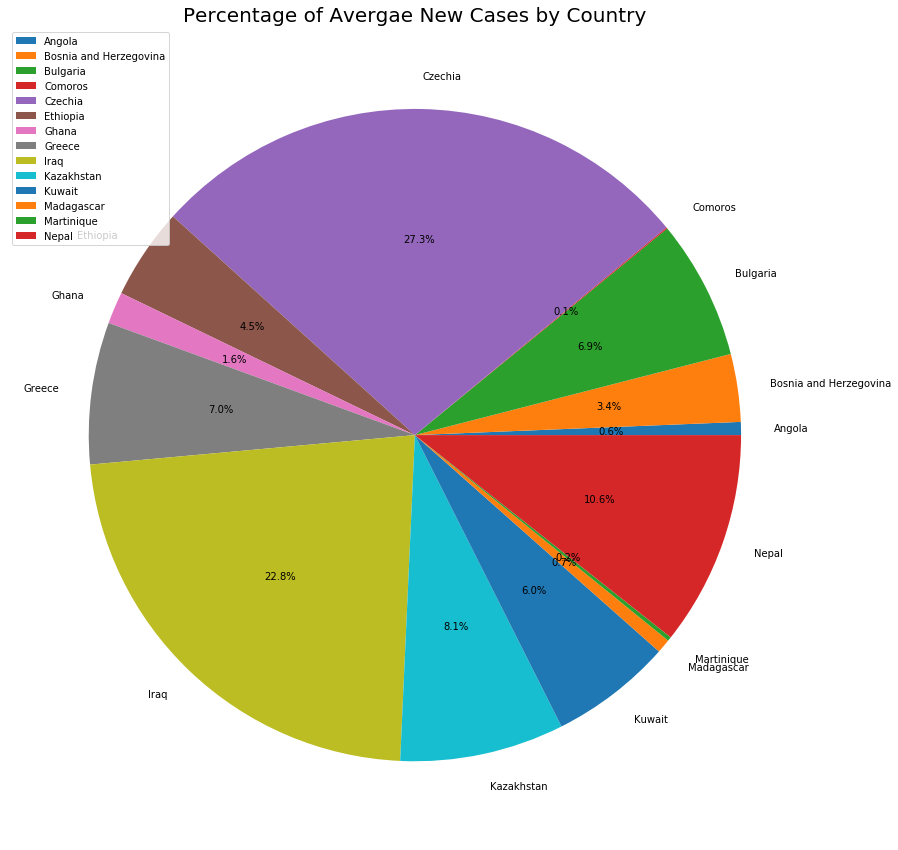

In [124]:
plt.figure(figsize = (15,15))
plt.pie(new_countries['New_cases'], labels = new_countries.index, autopct = '%1.1f%%')
plt.title('Percentage of Avergae New Cases by Country', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

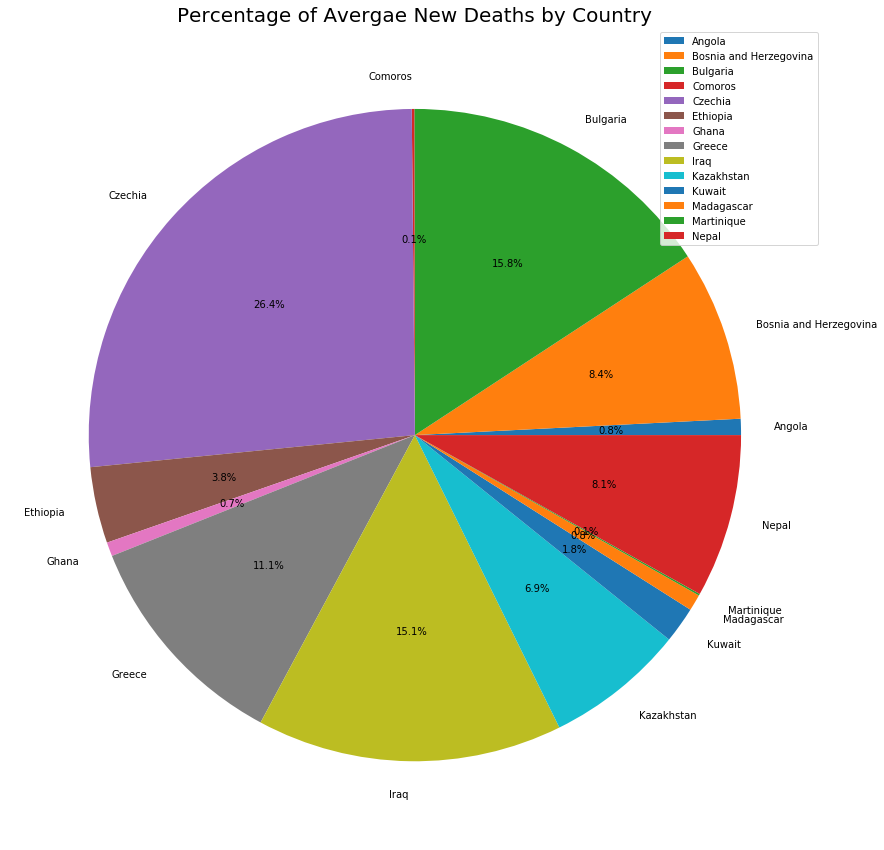

In [125]:
plt.figure(figsize = (15,15))
plt.pie(new_countries['New_deaths'], labels = new_countries.index, autopct = '%1.1f%%')
plt.title('Percentage of Avergae New Deaths by Country', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

We can see that the Czech Republic has expreienced the highest percentage of new covid cases on average. Regarding new deaths, we see that again the Czech Republic had the highest amount, which makes sense since they had the highest amount of cases, but we see that on second place, instead of Iraq in the first plot, in the second plot we see that Bulgaria had the second biggest percentage of new deaths in general. Since I'm from Bosnia and Herzegovina, I'd like to see a few more details about the country:

In [118]:
ba_country = df[df['Country'] == 'Bosnia and Herzegovina']
ba_country

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,pct_cases
14366,2020-01-03,BA,Bosnia and Herzegovina,EURO,0,0,0,0,NaN
14367,2020-01-04,BA,Bosnia and Herzegovina,EURO,0,0,0,0,NaN
14368,2020-01-05,BA,Bosnia and Herzegovina,EURO,0,0,0,0,NaN
14369,2020-01-06,BA,Bosnia and Herzegovina,EURO,0,0,0,0,NaN
14370,2020-01-07,BA,Bosnia and Herzegovina,EURO,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...
14913,2021-07-03,BA,Bosnia and Herzegovina,EURO,15,205047,0,9667,0.007315
14914,2021-07-04,BA,Bosnia and Herzegovina,EURO,11,205058,0,9667,0.005364
14915,2021-07-05,BA,Bosnia and Herzegovina,EURO,6,205064,1,9668,0.002926
14916,2021-07-06,BA,Bosnia and Herzegovina,EURO,7,205071,1,9669,0.003413


One of the ways to check the highest amount of new cases that was reported in a day is by doing the following:

In [120]:
df.loc[df.Country_code == 'BA',['New_cases']].max()

New_cases    2154
dtype: int64

We could make a scatter plot to see the relation between new_deaths and new_cases:

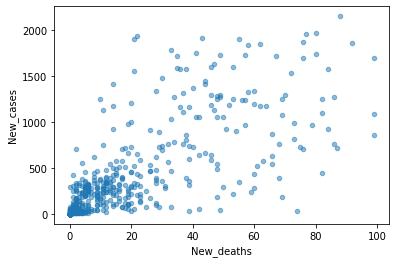

In [119]:
ba_country.plot.scatter(x="New_deaths", y="New_cases", alpha=0.5)

We can see that every day that the report about the covid situation in BA was made, there was more new cases that there was new deaths, so there was more patients coming in than there was patients who died.